By observing the generated images, we can see that the inteference steps are related to the noise level. More steps lead to clearer images, but not necessarily more recognizable.

In [7]:
import torch
torch.cuda.empty_cache()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [8]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", use_safetensors=True).to(device)

Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 14.59it/s]


100%|██████████| 50/50 [01:17<00:00,  1.55s/it]


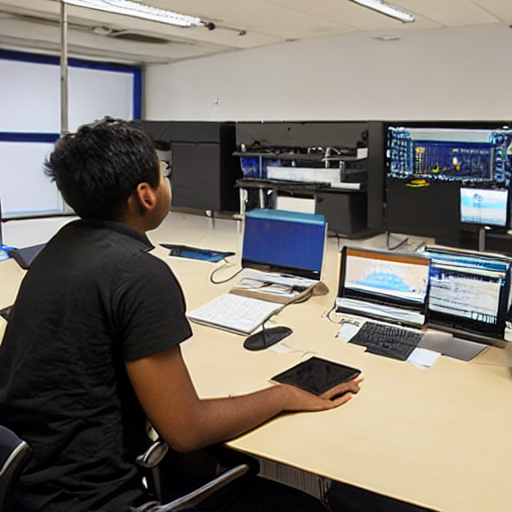

In [9]:
image = pipeline("students with all ethnics studying in a high performance computer lab with a cat in ever spot").images[0]
image

Different schedulars come with different denoising and quality trade-offs. The best schedulars are the ones that can balance the trade-offs and generate the best images.

In [10]:
# Clear CUDA cache between generations
torch.cuda.empty_cache()

In [11]:
from diffusers import EulerDiscreteScheduler

pipeline = DiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", use_safetensors=True)
pipeline.scheduler = EulerDiscreteScheduler.from_config(pipeline.scheduler.config)
pipeline = pipeline.to(device)

Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 14.29it/s]


100%|██████████| 50/50 [00:25<00:00,  2.00it/s]


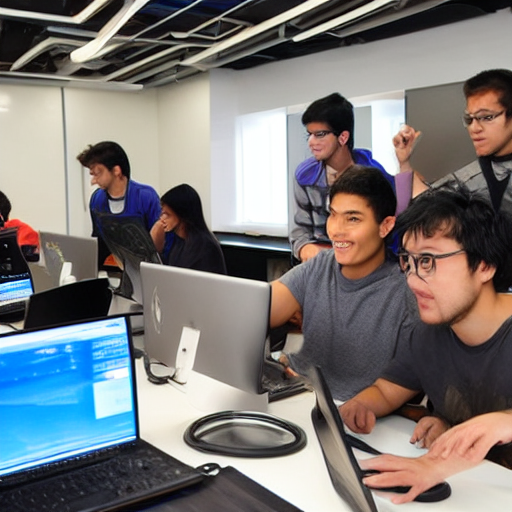

In [12]:
image = pipeline("students with all ethnics studying in a high performance computer lab with a cat in ever spot").images[0]
image